# Project: 001 - 2022 Market Analysis - California Real Estate Inc

---
---

## 1. CONSULTATION

### 1.1 Personel
    1.1.1 User: Online Advertisors(GoogleAd,FacebookAd,...)
    1.1.2 Insider: Marketing Campaign Manager(Course commentary from Iliya)
    1.1.3 Approver: Marketing Manager
    1.1.4 Payer: Chief Financial Officer

### 1.2 Goals
    1.2.1 Efficient use of Resources

### 1.3 Objectives
    1.3.1 Focus advertisements on stereotype with the highest potential for greater revenue(target)

### 1.4 Requirements
    1.4.1 Advise on characteristics of the target based on descriptive statistics of given data

### 1.5 Scoope
    1.5.1 Included: give characteristical description of the target
    1.5.2 Excluded: degree of potential

### 1.6 Constraints
    1.6.1 Time: 13 day, ending with 2021-04-30
    1.6.2 Budget: 15000 CAD
    1.6.3 Other resources

### 1.7 Decision
    1.7.1 Decider: Richard Mfitumukiza 
    1.7.2 Decision: Accepted
    1.7.3 Time: 2021-04-17
    1.7.4 Signature: %#01%(e1y$^&*90i)

---
---

## 2. PLANNING

### 2.1 Work breakdown
    => Tasks

### 2.2 Resources identification
    => Staff, other resources, Time, Cost

### 2.3 Resources assignment
    => ToDo lists, Schedule, Budget

### 2.4 Communication plan
    => contacts repertory, communication directives

### 2.5 Risk plan
    => risk management directives

---
---

## 3. Execution

### 3.1 Software engineering


    Not applicable

---

### 3.2 Data engineering


File path:

>Nextcloud/Education/Bachelor of Computer Science Honours Coop/Data_Science/Statistics for Data Science and Business Analysis/05 Practical example_ descriptive statistics/Practical-example.csv


---

### 3.3 Data science

In [1]:
import numpy as np
import pandas as pd

from bokeh import __version__ as bkv
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.palettes import Blues
from bokeh.models import ColumnDataSource, LinearAxis, Range1d, VBar
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs

import sklearn as skl

# Versions:
print("numpy - %s" %np.__version__)
print("pandas - %s" %pd.__version__)
print("bokeh - %s" %bkv)
print("scikit-learn - %s" %skl.__version__)



numpy - 1.21.2
pandas - 1.3.5
bokeh - 2.4.2
scikit-learn - 1.0.1


#### 3.3.1 Descriptive statistics / Exploratory data Analysis

##### 3.3.1.1 Raw data

In [2]:
file_path = './Practical-example.csv'

raw_data = pd.read_csv(file_path, header=None)
raw_data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,Product,Product,Product,Product,Product,Product,Product,Product,Product,Customer,...,Customer,NaN,NaN,Customer,Customer,Customer,Customer,Customer,Customer,Customer
1,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
2,1030,1,2005,11,Apartment,30,743.0856,"$246,172.68",Sold,C0028,...,1986,6,21,F,USA,California,Home,5,No,Website
3,1029,1,2005,10,Apartment,29,756.2128,"$246,331.90",Sold,C0027,...,1983,2,24,F,USA,California,Home,5,No,Website
4,2002,2,2007,7,Apartment,2,587.2808,"$209,280.91",Sold,C0112,...,1985,12,27,M,USA,California,Home,1,Yes,Client
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,5044,5,NaN,NaN,Apartment,44,1238.5836,"$322,610.74",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5047,5,NaN,NaN,Apartment,47,794.5184,"$279,191.26",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,5048,5,NaN,NaN,Apartment,48,1013.2692,"$287,996.53",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,5050,5,NaN,NaN,Apartment,50,1074.7088,"$365,868.78",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
raw_data[:3].values # row [0:2] are headers => apply multiple headers format; cells [0,16:18] are missing values => fill in 'Customer'

array([['Product', 'Product', 'Product', 'Product', 'Product', 'Product',
        'Product', 'Product', 'Product', 'Customer', 'Customer',
        'Customer', 'Customer', 'Customer', 'Customer', 'Customer', nan,
        nan, 'Customer', 'Customer', 'Customer', 'Customer', 'Customer',
        'Customer', 'Customer'],
       ['ID', 'Building', 'Year of sale', 'Month of sale',
        'Type of property', 'Property #', 'Area (ft.)', 'Price',
        'Status', 'Customer ID', 'Entity', 'Name', 'Surname',
        'Age at time of purchase', 'Interval', 'Y', 'M', 'D', 'Gender',
        'Country', 'State', 'Purpose', 'Deal satisfaction', 'Mortgage',
        'Source'],
       ['1030', '1', '2005', '11', 'Apartment', '30', '743.0856',
        '$246,172.68', ' Sold ', 'C0028', 'Individual', 'Madalyn',
        'Mercer', '19', '18-25', '1986', '6', '21', 'F', 'USA',
        'California', 'Home', '5', 'No', 'Website']], dtype=object)

In [4]:
raw_data[:][0].values 
raw_data[:][0].is_unique # identifier has duplicated values. => remove unsold duplicates


False

In [5]:
raw_data[:][1].values
raw_data[:][1].unique() # what does the values mean? => it means building number on a lot with multiple buildings. change header to 'building number'

array(['Product', 'Building', '1', '2', '3', '4', '5'], dtype=object)

In [6]:
raw_data[:][2].values
raw_data[:][2].sort_values().unique() # there were no sales in 2009? => It is confirmed that there were no sales in 2009.


array(['2004', '2005', '2006', '2007', '2008', '2010', 'Product',
       'Year of sale', nan], dtype=object)

In [7]:
raw_data[:][3].values
raw_data[:][3].sort_values().unique()


array(['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9',
       'Month of sale', 'Product', nan], dtype=object)

In [8]:
raw_data[:][4].values # product - type of property
raw_data[3:][4].sort_values().unique()


array(['Apartment', 'Office'], dtype=object)

In [9]:
raw_data[:][5].values # product - property #
raw_data[3:][5].sort_values().unique() # what does the values mean ? => It means the apartment number or office number.


array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '6', '7', '8', '9'], dtype=object)

In [10]:
raw_data[:][6].values # product - area(ft.)
raw_data[3:][6].sort_values().values
raw_data[3:][6].sort_values().unique()


array(['1013.2692', '1057.9232', '1058.246', '1068.5756', '1074.7088',
       '1093.0008', '1109.2484', '1110.3244', '1111.7232', '1121.9452',
       '1127.7556', '1128.4012', '1132.0596', '1137.4396', '1160.3584',
       '1171.5488', '1200.82', '1203.2908', '1222.336', '1238.5836',
       '1273.5536', '1273.8764', '1283.4528', '1288.6176', '1305.6184',
       '1307.4476', '1325.3092', '1336.93', '1343.386', '1357.1588',
       '1375.4508', '1383.8436', '1396.8632', '1400.952', '1434.0928',
       '1479.7152', '1596.3536', '1603.9932', '1604.7464', '1608.8352',
       '1611.848', '1615.2912', '1769.482', '1942.5028', '410.7092',
       '579.7488', '587.2808', '598.5788', '606.326', '618.162',
       '618.3772', '625.8016', '649.6888', '649.7964', '669.1644',
       '670.2404', '670.886', '675.19', '680.57', '697.8936', '701.6596',
       '713.7108', '717.0464', '720.382', '720.7048', '720.8124',
       '722.9644', '723.8252', '723.9328', '733.1864', '736.6296',
       '743.0856', '743.

In [11]:
raw_data[:][7].values # product - price => change header to 'price (USD)'; remove the dollar sign
raw_data[3:][7].sort_values().values


array(['$117,564.07', '$147,343.69', '$153,466.71', '$163,162.88',
       '$165,430.28', '$168,834.04', '$169,158.29', '$171,262.65',
       '$175,773.59', '$177,555.06', '$179,674.08', '$188,273.73',
       '$188,743.11', '$189,194.31', '$190,119.50', '$191,389.87',
       '$192,092.24', '$193,660.62', '$195,153.16', '$195,874.94',
       '$196,142.19', '$196,220.05', '$197,053.51', '$197,869.36',
       '$198,075.99', '$198,591.85', '$198,841.70', '$199,054.20',
       '$199,216.40', '$199,730.73', '$200,148.89', '$200,300.63',
       '$200,678.75', '$200,719.02', '$201,518.89', '$203,491.85',
       '$204,027.09', '$204,286.67', '$204,292.49', '$204,434.68',
       '$204,808.16', '$205,085.40', '$205,098.21', '$206,445.42',
       '$206,631.81', '$206,958.71', '$207,281.59', '$207,581.43',
       '$208,655.67', '$208,930.81', '$209,280.91', '$210,038.70',
       '$210,745.17', '$210,824.06', '$211,406.87', '$212,265.67',
       '$212,520.83', '$212,644.39', '$212,916.36', '$213,942.

In [12]:
raw_data[:][8].values # product - status
raw_data[3:][8].sort_values().values
raw_data[3:][8].sort_values().unique()


array([' Sold ', nan], dtype=object)

In [13]:
raw_data[:][9].values # customer - customer ID
raw_data[3:][9].sort_values().values
raw_data[3:][9].dropna().is_unique 
raw_data[3:][9].dropna().duplicated().values # customer ID has duplicates, no problem.


array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [14]:
raw_data[:][10].values # customer - entity
raw_data[3:][10].sort_values().values
raw_data[3:][10].sort_values().unique()


array(['Firm', 'Individual', nan], dtype=object)

In [15]:
raw_data[:][11].values # customer - name
raw_data[2:][11].sort_values().values


array(['Abdiel', 'Adriana', 'Adriana', 'Aiyana', 'Alanna', 'Alejandra',
       'Aleksandra', 'Alessandra', 'Alonso', 'Alonso', 'Alonso', 'Amanda',
       'Anahi', 'Aniya', 'Aniyah', 'Annabel', 'Antonio', 'Antonio',
       'Anya', 'Arabella', 'Araceli', 'Arthur', 'Augustus', 'Augustus',
       'Ava', 'Avah', 'Belinda', 'Bennett', 'Bridger CAL', 'Bridger CAL',
       'Brisa', 'Brock', 'Camille', 'Case', 'Cedric', 'Christian', 'Cole',
       'Colin', 'Conner', 'Conner', 'Crystal', 'Curtis', 'Dangelo',
       'Darien', 'Davion', 'Dayton', 'Derick', 'Diana', 'Diego',
       'Donavan', 'Elena', 'Emely', 'Emilie', 'Emmett', 'Emmy', 'Enrique',
       'Erik', 'Erika', 'Erika', 'Esther', 'Ezra', 'Frank', 'Frank',
       'Franklin', 'Gianni', 'Gordon', 'Grace', 'Grant', 'Harley',
       'Hazel', 'Helen', 'Henry', 'Iris', 'Irvin', 'Isis', 'Issac',
       'Issac', 'Ivan', 'Jace', 'Jack', 'Jack', 'Jack', 'Jacqueline',
       'Jaelyn', 'Jair', 'Jakobe', 'Jamal', 'Jamal', 'Janelle', 'Jaylen',
       '

In [16]:
raw_data[:][12].values # customer - surname
raw_data[2:][12].sort_values().values


array(['Aleksandrov', 'Ali', 'Anderson', 'Ayers', 'Bailey', 'Benitez',
       'Bennett', 'Berger', 'Blake', 'Bray', 'Bright', 'Brown',
       'Buchanan', 'Cameron', 'Campos', 'Cardenas', 'Carr', 'Carrillo',
       'Chandler', 'Charles', 'Chen', 'Choi', 'Christensen', 'Cline',
       'Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'Co',
       'Co', 'Co', 'Co', 'Co', 'Co', 'Co', 'Collier', 'Costa', 'Crane',
       'Cross', 'Curry', 'Dorsey', 'Edwards', 'Edwards', 'Ellis',
       'Espinoza', 'Estes', 'Ewing', 'Faulkner', 'Faulkner', 'Faulkner',
       'Faulkner', 'Faulkner', 'Faulkner', 'Faulkner', 'Ferrell',
       'Fischer', 'Fisher', 'Flowers', 'Forbes', 'Franco', 'Fritz',
       'Fuller', 'Fuller', 'Gallagher', 'Gay', 'Gibson', 'Gilbert',
       'Glass', 'Glover', 'Goodwin', 'Grant', 'Greer', 'Gross', 'Gross',
       'Guerra', 'Hansen', 'Hanson', 'Hanson', 'Hatfield', 'Hendricks',
       'Hess', 'Hickman', 'Hinton', 'Hinton', 'Hogan', 'Holland', 'Horne',
       'Howard', 

In [17]:
raw_data[:][13].values # customer - age at time of purchase => change header to 'age (yr) at time of purchase'
raw_data[2:][13].sort_values().values
raw_data[2:][13].sort_values().unique()


array([' ', '19', '22', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '59', '60', '61', '64', '65', '66', '67', '68', '69',
       '71', '73', '76', nan], dtype=object)

In [18]:
raw_data[:][14].values # customer - age bracket => change '65' to '66-+'
raw_data[2:][14].sort_values().values
raw_data[2:][14].sort_values().unique()


array(['18-25', '26-35', '36-45', '46-55', '56-65', '65', nan],
      dtype=object)

In [19]:
raw_data[:][15].values # customer - dob ( year)
raw_data[2:][15].sort_values().values


array(['1931', '1932', '1933', '1933', '1936', '1936', '1937', '1938',
       '1938', '1938', '1938', '1939', '1939', '1939', '1940', '1941',
       '1941', '1941', '1941', '1942', '1942', '1942', '1943', '1943',
       '1946', '1947', '1947', '1947', '1947', '1947', '1947', '1947',
       '1947', '1947', '1948', '1948', '1948', '1948', '1948', '1949',
       '1949', '1949', '1949', '1950', '1950', '1951', '1952', '1952',
       '1952', '1953', '1953', '1953', '1953', '1953', '1954', '1954',
       '1954', '1955', '1955', '1956', '1956', '1956', '1956', '1957',
       '1957', '1957', '1957', '1958', '1958', '1958', '1958', '1958',
       '1959', '1959', '1959', '1959', '1959', '1959', '1959', '1959',
       '1959', '1959', '1959', '1960', '1960', '1962', '1962', '1962',
       '1962', '1962', '1962', '1962', '1962', '1963', '1963', '1963',
       '1963', '1963', '1964', '1964', '1964', '1964', '1964', '1964',
       '1965', '1965', '1965', '1965', '1965', '1966', '1966', '1966',
      

In [20]:
raw_data[:][16].values # customer - dob (month)
raw_data[2:][16].sort_values().values
raw_data[2:][16].sort_values().unique() # one values out of range => fill in an aggregate a value in range


array(['1', '10', '11', '12', '15', '2', '3', '4', '5', '6', '7', '8',
       '9', nan], dtype=object)

In [21]:
raw_data[:][17].values # customer - dob (day)
raw_data[2:][17].sort_values().values
raw_data[2:][17].sort_values().unique() 


array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '4', '5', '6', '7', '8', '9', nan], dtype=object)

In [22]:
raw_data[:][18].values # customer - gender
raw_data[2:][18].sort_values().values
raw_data[2:][18].sort_values().unique()


array(['F', 'M', nan], dtype=object)

In [23]:
raw_data[:][19].values # customer - country
raw_data[2:][19].sort_values().values
raw_data[2:][19].sort_values().unique() #typo => change 'USA ' to 'USA'


array(['Belgium', 'Canada', 'Denmark', 'Germany', 'Mexico', 'Russia',
       'UK', 'USA', 'USA ', nan], dtype=object)

In [24]:
raw_data[:][20].values # customer - state
raw_data[2:][20].sort_values().values
raw_data[2:][20].sort_values().unique()


array(['Arizona', 'California', 'Colorado', 'Kansas', 'Nevada', 'Oregon',
       'Utah', 'Virginia', 'Wyoming', nan], dtype=object)

In [25]:
raw_data[:][21].values # customer - purpose
raw_data[2:][21].sort_values().values
raw_data[2:][21].sort_values().unique()


array(['Home', 'Investment', nan], dtype=object)

In [26]:
raw_data[:][22].values # customer - satisfaction
raw_data[2:][22].sort_values().values
raw_data[2:][22].sort_values().unique()


array(['1', '2', '3', '4', '5', nan], dtype=object)

In [27]:
raw_data[:][23].values # customer - took mortgage?
raw_data[2:][23].sort_values().values
raw_data[2:][23].sort_values().unique()


array(['No', 'Yes', nan], dtype=object)

In [28]:
raw_data[:][24].values # customer - marketing channel
raw_data[2:][24].sort_values().values
raw_data[2:][24].sort_values().unique()


array(['Agency', 'Client', 'Website', nan], dtype=object)

##### 3.3.1.2 Feature engineering

In [29]:
raw_data[:3].values # row [0:2] are headers => apply multiple headers format; cells [0,16:18] are missing values => fill in 'Customer'

# header missing values
raw_data[:3].values
raw_data[16][0]='Customer'
raw_data[17][0]='Customer'
raw_data[:3].values

# appliying multi-level headers
df = raw_data.copy()
df

df.columns = [df.iloc[0], df.iloc[1]]
df

df = df[2:].reset_index(drop=True)
df

0   Product                                                                  \
1        ID Building Year of sale Month of sale Type of property Property #   
0      1030        1         2005            11        Apartment         30   
1      1029        1         2005            10        Apartment         29   
2      2002        2         2007             7        Apartment          2   
3      2031        2         2007            12        Apartment         31   
4      1049        1         2004            11        Apartment         49   
..      ...      ...          ...           ...              ...        ...   
262    5044        5          NaN           NaN        Apartment         44   
263    5047        5          NaN           NaN        Apartment         47   
264    5048        5          NaN           NaN        Apartment         48   
265    5050        5          NaN           NaN        Apartment         50   
266    5051        5          NaN           NaN        Apartment         51   

0                                      Customer  ...                         \
1   Area (ft.)        Price  Status Customer ID  ...     Y    M    D Gender   
0     743.0856  $246,172.68   Sold        C0028  ...  1986    6   21      F   
1     756.2128  $246,331.90   Sold        C0027  ...  1983    2   24      F   
2     587.2808  $209,280.91   Sold        C0112  ...  1985   12   27      M   
3    1604.7464  $452,667.01   Sold        C0160  ...  1985   12   27      M   
4    1375.4508  $467,083.31   Sold        C0014  ...  1979    5   15      F   
..         ...          ...     ...         ...  ...   ...  ...  ...    ...   
262  1238.5836  $322,610.74     NaN         NaN  ...   NaN  NaN  NaN    NaN   
263   794.5184  $279,191.26     NaN         NaN  ...   NaN  NaN  NaN    NaN   
264  1013.2692  $287,996.53     NaN         NaN  ...   NaN  NaN  NaN    NaN   
265  1074.7088  $365,868.78     NaN         NaN  ...   NaN  NaN  NaN    NaN   
266    789.246  $199,216.40     NaN         NaN  ...   NaN  NaN  NaN    NaN   

0                                                                        
1   Country       State     Purpose Deal satisfaction Mortgage   Source  
0       USA  California        Home                 5       No  Website  
1       USA  California        Home                 5       No  Website  
2       USA  California        Home                 1      Yes   Client  
3       USA  California  Investment                 3      Yes  Website  
4       USA  California        Home                 4       No   Agency  
..      ...         ...         ...               ...      ...      ...  
262     NaN         NaN         NaN               NaN      NaN      NaN  
263     NaN         NaN         NaN               NaN      NaN      NaN  
264     NaN         NaN         NaN               NaN      NaN      NaN  
265     NaN         NaN         NaN               NaN      NaN      NaN  
266     NaN         NaN         NaN               NaN      NaN      NaN  

[267 rows x 25 columns]

In [30]:
# raw_data[:][0].values 
# raw_data[:][0].is_unique # identifier has duplicated values. => remove unsold duplicates

# removing unsold duplicates
df['Product','ID'] # product - id
df['Product','ID'].is_unique # identifier has duplicated values. => remove unsold duplicates

df['Product','ID'].values 
df['Product','ID'].sort_values().values

duplicates = df['Product','ID'].duplicated(keep=False)
duplicates
duplicates = df[duplicates]
duplicates
duplicates = duplicates[duplicates['Product','Status']!=' Sold ']
duplicates
df = df.drop(duplicates.index)
df

df['Product','ID'].is_unique

duplicates = df['Product','ID'].duplicated(keep=False)
duplicates.values
df[duplicates]

df.iloc[181][0]
df.iloc[181][0] = 5053
df.iloc[181][0]

df['Product','ID'].is_unique


True

In [31]:
# raw_data[:][1].values
# raw_data[:][1].unique() # what does the values mean? => it means building number on a lot with multiple buildings, change header to 'building #'

# changing header 'building' to 'building number'
df.rename(columns={'Building':'Building #'}, inplace=True)
df

0   Product                                                                    \
1        ID Building # Year of sale Month of sale Type of property Property #   
0      1030          1         2005            11        Apartment         30   
1      1029          1         2005            10        Apartment         29   
2      2002          2         2007             7        Apartment          2   
3      2031          2         2007            12        Apartment         31   
4      1049          1         2004            11        Apartment         49   
..      ...        ...          ...           ...              ...        ...   
259    5038          5          NaN           NaN        Apartment         38   
261    5043          5          NaN           NaN        Apartment         43   
262    5044          5          NaN           NaN        Apartment         44   
263    5047          5          NaN           NaN        Apartment         47   
264    5048          5          NaN           NaN        Apartment         48   

0                                      Customer  ...                         \
1   Area (ft.)        Price  Status Customer ID  ...     Y    M    D Gender   
0     743.0856  $246,172.68   Sold        C0028  ...  1986    6   21      F   
1     756.2128  $246,331.90   Sold        C0027  ...  1983    2   24      F   
2     587.2808  $209,280.91   Sold        C0112  ...  1985   12   27      M   
3    1604.7464  $452,667.01   Sold        C0160  ...  1985   12   27      M   
4    1375.4508  $467,083.31   Sold        C0014  ...  1979    5   15      F   
..         ...          ...     ...         ...  ...   ...  ...  ...    ...   
259  1273.5536  $448,574.67     NaN         NaN  ...   NaN  NaN  NaN    NaN   
261   598.5788  $175,773.59     NaN         NaN  ...   NaN  NaN  NaN    NaN   
262  1238.5836  $322,610.74     NaN         NaN  ...   NaN  NaN  NaN    NaN   
263   794.5184  $279,191.26     NaN         NaN  ...   NaN  NaN  NaN    NaN   
264  1013.2692  $287,996.53     NaN         NaN  ...   NaN  NaN  NaN    NaN   

0                                                                        
1   Country       State     Purpose Deal satisfaction Mortgage   Source  
0       USA  California        Home                 5       No  Website  
1       USA  California        Home                 5       No  Website  
2       USA  California        Home                 1      Yes   Client  
3       USA  California  Investment                 3      Yes  Website  
4       USA  California        Home                 4       No   Agency  
..      ...         ...         ...               ...      ...      ...  
259     NaN         NaN         NaN               NaN      NaN      NaN  
261     NaN         NaN         NaN               NaN      NaN      NaN  
262     NaN         NaN         NaN               NaN      NaN      NaN  
263     NaN         NaN         NaN               NaN      NaN      NaN  
264     NaN         NaN         NaN               NaN      NaN      NaN  

[241 rows x 25 columns]

In [32]:
# raw_data[:][7].values # product - price => change header to 'price (USD)'; remove the dollar sign
# raw_data[3:][7].sort_values().values

# changing header to 'price (USD)'
df.rename(columns={'Price':'Price (USD)'}, inplace=True)
df

# removing the $ and , signs
df['Product','Price (USD)'] = df['Product','Price (USD)'].replace({'\$':'',',':''}, regex=True).astype(float)
df

0   Product                                                                    \
1        ID Building # Year of sale Month of sale Type of property Property #   
0      1030          1         2005            11        Apartment         30   
1      1029          1         2005            10        Apartment         29   
2      2002          2         2007             7        Apartment          2   
3      2031          2         2007            12        Apartment         31   
4      1049          1         2004            11        Apartment         49   
..      ...        ...          ...           ...              ...        ...   
259    5038          5          NaN           NaN        Apartment         38   
261    5043          5          NaN           NaN        Apartment         43   
262    5044          5          NaN           NaN        Apartment         44   
263    5047          5          NaN           NaN        Apartment         47   
264    5048          5          NaN           NaN        Apartment         48   

0                                     Customer  ...                         \
1   Area (ft.) Price (USD)  Status Customer ID  ...     Y    M    D Gender   
0     743.0856   246172.68   Sold        C0028  ...  1986    6   21      F   
1     756.2128   246331.90   Sold        C0027  ...  1983    2   24      F   
2     587.2808   209280.91   Sold        C0112  ...  1985   12   27      M   
3    1604.7464   452667.01   Sold        C0160  ...  1985   12   27      M   
4    1375.4508   467083.31   Sold        C0014  ...  1979    5   15      F   
..         ...         ...     ...         ...  ...   ...  ...  ...    ...   
259  1273.5536   448574.67     NaN         NaN  ...   NaN  NaN  NaN    NaN   
261   598.5788   175773.59     NaN         NaN  ...   NaN  NaN  NaN    NaN   
262  1238.5836   322610.74     NaN         NaN  ...   NaN  NaN  NaN    NaN   
263   794.5184   279191.26     NaN         NaN  ...   NaN  NaN  NaN    NaN   
264  1013.2692   287996.53     NaN         NaN  ...   NaN  NaN  NaN    NaN   

0                                                                        
1   Country       State     Purpose Deal satisfaction Mortgage   Source  
0       USA  California        Home                 5       No  Website  
1       USA  California        Home                 5       No  Website  
2       USA  California        Home                 1      Yes   Client  
3       USA  California  Investment                 3      Yes  Website  
4       USA  California        Home                 4       No   Agency  
..      ...         ...         ...               ...      ...      ...  
259     NaN         NaN         NaN               NaN      NaN      NaN  
261     NaN         NaN         NaN               NaN      NaN      NaN  
262     NaN         NaN         NaN               NaN      NaN      NaN  
263     NaN         NaN         NaN               NaN      NaN      NaN  
264     NaN         NaN         NaN               NaN      NaN      NaN  

[241 rows x 25 columns]

In [33]:
# raw_data[:][13].values # customer - age at time of purchase => change header to 'age (yr) at time of purchase'
# raw_data[2:][13].sort_values().values
# raw_data[2:][13].sort_values().unique()

# changing header to 'age (yr) at time of purchase'
df.columns
df.rename(columns={'Age at time of purchase':'Age (yr) at time of purchase'}, inplace=True)
df.columns

MultiIndex([( 'Product',                           'ID'),
            ( 'Product',                   'Building #'),
            ( 'Product',                 'Year of sale'),
            ( 'Product',                'Month of sale'),
            ( 'Product',             'Type of property'),
            ( 'Product',                   'Property #'),
            ( 'Product',                   'Area (ft.)'),
            ( 'Product',                  'Price (USD)'),
            ( 'Product',                       'Status'),
            ('Customer',                  'Customer ID'),
            ('Customer',                       'Entity'),
            ('Customer',                         'Name'),
            ('Customer',                      'Surname'),
            ('Customer', 'Age (yr) at time of purchase'),
            ('Customer',                     'Interval'),
            ('Customer',                            'Y'),
            ('Customer',                            'M'),
            ('

In [34]:
# raw_data[:][14].values # customer - age bracket => change '65' to '66-+'
# raw_data[2:][14].sort_values().values
# raw_data[2:][14].sort_values().unique()

# changing all values of '65' to '66-+'
df['Customer','Interval'].unique()
df['Customer','Interval'] = df['Customer','Interval'].replace({'^65':'66-+'}, regex=True)
df['Customer','Interval'].unique()

array(['18-25', '26-35', '36-45', '46-55', '56-65', '66-+', nan],
      dtype=object)

In [35]:
# raw_data[:][19].values # customer - country
# raw_data[2:][19].sort_values().values
# raw_data[2:][19].sort_values().unique() #typo => change 'USA ' to 'USA'

# changing all 'USA '  to 'USA'
df.Customer.Country.unique()
df['Customer','Country'] = df['Customer','Country'].replace({'USA ':'USA'}, regex=True)
df.Customer.Country.unique()

array(['USA', 'UK', 'Belgium', 'Russia', 'Denmark', 'Germany', 'Mexico',
       'Canada', nan], dtype=object)

In [36]:
# df['Customer', 'Age (yr) at time of purchase']
# containes a ' ' entry
# change ' ' to None

# df['Customer', 'Age (yr) at time of purchase']
# is not numberic
# change it to numeric

df.loc[:, ('Customer', 'Age (yr) at time of purchase')] == ' '
df[df.loc[:, ('Customer', 'Age (yr) at time of purchase')] == ' '] = None

df['Customer', 'Age (yr) at time of purchase'] = pd.to_numeric(df['Customer', 'Age (yr) at time of purchase'])
df.dtypes

0         1                           
Product   ID                               object
          Building #                       object
          Year of sale                     object
          Month of sale                    object
          Type of property                 object
          Property #                       object
          Area (ft.)                       object
          Price (USD)                     float64
          Status                           object
Customer  Customer ID                      object
          Entity                           object
          Name                             object
          Surname                          object
          Age (yr) at time of purchase    float64
          Interval                         object
          Y                                object
          M                                object
          D                                object
          Gender                           object
          C

In [37]:
df

0   Product                                                                    \
1        ID Building # Year of sale Month of sale Type of property Property #   
0      1030          1         2005            11        Apartment         30   
1      1029          1         2005            10        Apartment         29   
2      2002          2         2007             7        Apartment          2   
3      2031          2         2007            12        Apartment         31   
4      1049          1         2004            11        Apartment         49   
..      ...        ...          ...           ...              ...        ...   
259    5038          5          NaN           NaN        Apartment         38   
261    5043          5          NaN           NaN        Apartment         43   
262    5044          5          NaN           NaN        Apartment         44   
263    5047          5          NaN           NaN        Apartment         47   
264    5048          5          NaN           NaN        Apartment         48   

0                                     Customer  ...                         \
1   Area (ft.) Price (USD)  Status Customer ID  ...     Y    M    D Gender   
0     743.0856   246172.68   Sold        C0028  ...  1986    6   21      F   
1     756.2128   246331.90   Sold        C0027  ...  1983    2   24      F   
2     587.2808   209280.91   Sold        C0112  ...  1985   12   27      M   
3    1604.7464   452667.01   Sold        C0160  ...  1985   12   27      M   
4    1375.4508   467083.31   Sold        C0014  ...  1979    5   15      F   
..         ...         ...     ...         ...  ...   ...  ...  ...    ...   
259  1273.5536   448574.67     NaN         NaN  ...   NaN  NaN  NaN    NaN   
261   598.5788   175773.59     NaN         NaN  ...   NaN  NaN  NaN    NaN   
262  1238.5836   322610.74     NaN         NaN  ...   NaN  NaN  NaN    NaN   
263   794.5184   279191.26     NaN         NaN  ...   NaN  NaN  NaN    NaN   
264  1013.2692   287996.53     NaN         NaN  ...   NaN  NaN  NaN    NaN   

0                                                                        
1   Country       State     Purpose Deal satisfaction Mortgage   Source  
0       USA  California        Home                 5       No  Website  
1       USA  California        Home                 5       No  Website  
2       USA  California        Home                 1      Yes   Client  
3       USA  California  Investment                 3      Yes  Website  
4       USA  California        Home                 4       No   Agency  
..      ...         ...         ...               ...      ...      ...  
259     NaN         NaN         NaN               NaN      NaN      NaN  
261     NaN         NaN         NaN               NaN      NaN      NaN  
262     NaN         NaN         NaN               NaN      NaN      NaN  
263     NaN         NaN         NaN               NaN      NaN      NaN  
264     NaN         NaN         NaN               NaN      NaN      NaN  

[241 rows x 25 columns]

##### 3.3.1.3 analysis (visualization, tendency, variation, discernment)


In [38]:
output_notebook()


Loading BokehJS ...

In [39]:
# Customer frequency by gender

df_f_gender = df['Customer', 'Gender'].value_counts().to_frame(name='gender_freq')
df_f_gender['gender_rel_freq'] = df['Customer', 'Gender'].value_counts(normalize=True).mul(100).round(1)
#df_f_gender['gender_cum_freq'] = df_f_gender['gender_rel_freq'].cumsum()

df_f_gender['pie_chart_angle'] = df_f_gender['gender_rel_freq']*2*np.pi/100
Blues[3]
df_f_gender['pie_chart_color'] = ['#3182bd', '#9ecae1']
df_f_gender

,gender_freq,gender_rel_freq,pie_chart_angle,pie_chart_color
M,108,60.7,3.813893,#3182bd
F,70,39.3,2.469292,#9ecae1


In [40]:

p = figure(
    tooltips="@index=@gender_rel_freq"
)
p.title='Sales freqency by gender'
p.axis.visible=False
p.grid.grid_line_color=None

p.wedge(
    source=df_f_gender,
    x=0,
    y=0,
    radius=0.7,
    start_angle=cumsum('pie_chart_angle', include_zero=True),
    end_angle=cumsum('pie_chart_angle'),
    fill_color='pie_chart_color',
    legend_field='index',

    
)

show(p)

In [72]:
df_f_country = pd.DataFrame()
df_f_country['country'] = df.loc[:, ('Customer', 'Country')].value_counts().index
df_f_country['country_freq'] = df.loc[:, ('Customer', 'Country')].value_counts().values
df_f_country['country_cum_freq'] = df.loc[:, ('Customer', 'Country')].value_counts(normalize=True).cumsum().mul(100).round(1).values

df_f_country

,country,country_freq,country_cum_freq
0,USA,177,90.8
1,Canada,7,94.4
2,Russia,4,96.4
3,UK,2,97.4
4,Belgium,2,98.5
5,Denmark,1,99.0
6,Germany,1,99.5
7,Mexico,1,100.0


In [80]:
country_plot = figure(x_range=df_f_country['country'])

country_plot.title='Sales freqency by country'

country_plot.vbar(
    x=df_f_country['country'],
    bottom=0,
    top=df_f_country['country_freq'],
    color='firebrick',
    width=0.5
)

show(country_plot)

In [44]:
# Customer frequency by state

df_f_state = pd.DataFrame()
df_f_state['state'] = df['Customer', 'State'].value_counts().keys()
df_f_state['sales_freq'] = df['Customer', 'State'].value_counts().values
df_f_state['cum_sales_freq'] = df['Customer', 'State'].value_counts(normalize=True).cumsum().mul(100).round(1).values

df_f_state

,state,sales_freq,cum_sales_freq
0,California,119,65.7
1,Nevada,17,75.1
2,Arizona,11,81.2
3,Oregon,11,87.3
4,Colorado,11,93.4
5,Utah,6,96.7
6,Virginia,4,98.9
7,Kansas,1,99.4
8,Wyoming,1,100.0


In [101]:
state_plot = figure(x_range=df_f_state['state'])

state_plot.title='Sales freqency by state'

state_plot.vbar(
    x=df_f_state['state'],
    top=df_f_state['sales_freq'],
    bottom=0,
    color='firebrick',
    width=0.8,
)

show(state_plot)

array([[<AxesSubplot:title={'center':"('Customer', 'Age (yr) at time of purchase')"}>]],
      dtype=object)

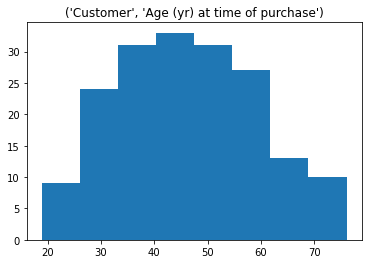

In [143]:
df.hist(grid=False, column=('Customer','Age (yr) at time of purchase'), bins=8 )

In [106]:
# Customer frequency by age bracket

# df_f_age_bracket = pd.DataFrame()
# df_f_age_bracket['age_bracket'] = df['Customer', 'Interval'].value_counts(sort=False).index
# df_f_age_bracket['age_freq'] = df['Customer', 'Interval'].value_counts(sort=False).values
# df_f_age_bracket

,age_bracket,age_freq
0,18-25,5
1,26-35,36
2,36-45,52
3,46-55,41
4,56-65,26
5,66-+,18


In [108]:
# age_bracket_plot = figure(x_range=df_f_age_bracket['age_bracket'])
# age_bracket_plot.title='Sales by age group'

# age_bracket_plot.vbar(
#     x=df_f_age_bracket['age_bracket'],
#     top=df_f_age_bracket.age_freq.values,
#     bottom=0
# )

# show(age_bracket_plot)

In [48]:
df['Customer', 'Age (yr) at time of purchase'].describe()

count    178.000000
mean      46.151685
std       12.841692
min       19.000000
25%       37.000000
50%       45.000000
75%       55.000000
max       76.000000
Name: (Customer, Age (yr) at time of purchase), dtype: float64

In [141]:
freq, brackets = np.histogram(
    df['Customer', 'Age (yr) at time of purchase'].dropna(),
    bins=8
)
brackets
freq
df_freq_age_group = pd.DataFrame(
    {
        'from_age':brackets[:-1],
        'to_age':brackets[1:],
        'sales_freq':freq
    }
)
df_freq_age_group

,from_age,to_age,sales_freq
0,19.000,26.125,9
1,26.125,33.250,24
2,33.250,40.375,31
3,40.375,47.500,33
4,47.500,54.625,31
5,54.625,61.750,27
6,61.750,68.875,13
7,68.875,76.000,10


In [142]:
age_group_plot = figure()
age_group_plot.title = 'Sales frequency by age group'
age_group_plot.x_range=Range1d(df_freq_age_group.from_age.iloc[0], df_freq_age_group.to_age.iloc[-1])
age_group_plot.xaxis.axis_label = 'Age'
age_group_plot.yaxis.axis_label = 'Sales frequency'

age_group_plot.quad(
    left=df_freq_age_group.from_age,
    right=df_freq_age_group.to_age,
    bottom=0,
    top=df_freq_age_group.sales_freq
)

show(age_group_plot)

In [51]:
df.columns
df_rel_age_price = pd.DataFrame()
df_rel_age_price['age'] = df['Customer','Age (yr) at time of purchase'].to_frame()
df_rel_age_price['price'] = df['Product','Price (USD)']
df_rel_age_price

,age,price
0,19.0,246172.68
1,22.0,246331.90
2,22.0,209280.91
3,22.0,452667.01
4,25.0,467083.31
...,...,...
259,NaN,448574.67
261,NaN,175773.59
262,NaN,322610.74
263,NaN,279191.26


In [52]:
age_price_plot = figure()

age_price_plot.title = 'Age and Price Relationship'

age_price_plot.circle(
    x=df_rel_age_price['age'],
    y=df_rel_age_price['price']
)

show(age_price_plot)

In [53]:
# df_rel_age_price.cov()
df_rel_age_price.corr()

,age,price
age,1.000000,-0.174893
price,-0.174893,1.000000


#### 3.3.2 Inferential statistics / AI Modelling & Research

#### 3.3.3 Reports / Deployment

## 4. Closure

### 4.1 Control handover

### 4.2 Payment finalization

### 4.3 Administrative report